## Con la intensión de generar un reporte de la data presentada por la empresa BTL Latino, se procedera hacer el analisis exploratorio de los datos con el fin de mejorar la data ver que se puede corregir y con que datos nos podemos quedar de el dataset,  para generar un informe tipo Dashboard y presentar diferentes indicadores.

Antes de lanzar codigo quiero aclarar que el dataset de btl ya le he echo una limpieza general con excel, el mismo tenia columnas irrelevantes sin ningun dato, con valores repetidos o columnas completamente nulas esto se hizo con excel por pura simplicidad 

In [1]:
#Importamos las librerias de Python para analisis y manipulación de datos
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
btl = pd.read_csv('BTL.csv', encoding='latin-1', sep=';') #Extraemos el dataset de btl

In [3]:
#Dimensiones del dataset
print("Número de columnas: ", btl.shape[1])
print("Numero de filas: ", btl.shape[0])

Número de columnas:  51
Numero de filas:  162


Aqui esta el primer inconveniente y es que al importar la data se trajo casi 100 filas que no existen en la data, como ya se que en realidad son 65 filas con datos me quedare con estas 65 primeras filas.

In [4]:
btl = btl.drop(btl.index[64:])  #Dropeamos desde la fila numero 64 hasta el final

In [5]:
btl.drop(columns={'Unnamed: 50'}, inplace=True)

In [6]:
btl.head(64) #vizualizamos la data

,Nombre del Asesor/Mercaderista BTL LATINO,Indicar Region de Visita,Indique el numero de Ruta,Fecha y hora de visita,Tasa USD del negocio,Indique que tipo de puesto de venta visita,Seleccione que cadena de Farmacia esta visitando,Nombre del PDV,El Producto Producto 1 se encuentra disponible en tienda?,1.1 Producto 1 (Caras Antes),...,5.4 Producto 5 (UND EN DEPOSITO)\nNOTA: SI NO SE LE CONCEDIO EL PERMISO DE ENTRAR EN EL DEPOSITO DEJE LA RESPUESTA VACIA,5.5 Producto 5 (Caras Después),El producto Producto 6 se encuentra disponible en tienda?,6.1 Producto 6 (Caras Antes),6.2 Producto 6 (PRECIO BS),6.3 Producto 6 (UND EN ANAQUEL),6.4 Producto 6 (UND EN DEPOSITO)\nNOTA: SI NO SE LE CONCEDIO EL PERMISO DE ENTRAR EN EL DEPOSITO DEJE LA RESPUESTA VACIA,6.5 Producto 6 (Caras Después),6.6 Competidor (CARAS),6.7 Competidor (PRECIO BS)
0,Tomador Data 1,Maracaibo,1.0,5/8/2023 10:50:00,"25,06",FARMACIA,FARMAEXPRESS,Farma Mara Plus los coches,Sí,2.0,...,29.0,0.0,Sí,0.0,"192,96",0.0,17.0,0.0,0.0,"165,4"
1,Tomador Data 1,Maracaibo,1.0,5/8/2023 12:00:00,"25,06",FARMACIA,FARMAEXPRESS,Farma Ya Tierra Negra 72,Sí,1.0,...,95.0,1.0,Sí,1.0,"146,29",37.0,298.0,1.0,1.0,"171,44"
2,Tomador Data 1,Maracaibo,1.0,5/8/2023 2:00:00,"25,06",FARMACIA,FARMAEXPRESS,Farma Mara Plus la Rubio,Sí,0.0,...,22.0,0.0,Sí,0.0,"196,22",0.0,78.0,0.0,0.0,0
3,Tomador Data 1,Maracaibo,1.0,5/8/2023 3:00:00,"25,03",FARMACIA,FARMAEXPRESS,Farmacia Saas Altamira,Sí,1.0,...,NaN,1.0,Sí,1.0,"173,56",2.0,NaN,1.0,1.0,"136,76"
4,Tomador Data 2,Valencia,1.0,5/8/2023 6:27:00,"25,06",FARMACIA,FARMATODO,Farmatodo alpes,Sí,3.0,...,0.0,3.0,Sí,3.0,"179,64",24.0,0.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Tomador Data 2,Valencia,1.0,5/12/2023 10:28:00,"25,37",FARMACIA,FARMATODO,Farmacia Fleming,No,NaN,...,0.0,1.0,Sí,1.0,140,2.0,0.0,0.0,0.0,0
60,Tomador Data 2,Valencia,1.0,5/12/2023 10:44:00,"25,37",FARMACIA,TORRE,Farmacia la torre naguanagua,No,NaN,...,0.0,0.0,Sí,1.0,"214,97",11.0,0.0,1.0,0.0,0
61,Tomador Data 4,Maracay,1.0,5/12/2023 1:24:00,"25,17",FARMACIA,MUNDO TOTAL,Farma total ( Aragua),Sí,1.0,...,0.0,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Tomador Data 4,Maracay,1.0,5/12/2023 1:59:00,"25,17",FARMACIA,FARMATODO,Farmacia jireh ( Aragua),No,NaN,...,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
btl.info() #informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 50 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   Nombre del Asesor/Mercaderista BTL LATINO                                                                                              64 non-null     object 
 1   Indicar Region de Visita                                                                                                               64 non-null     object 
 2   Indique el numero de Ruta                                                                                                              64 non-null     float64
 3   Fecha y hora de visita                                                  

In [8]:
btl.isna().sum() #Cantidad de valores faltantes por columna

Nombre del Asesor/Mercaderista BTL LATINO                                                                                                  0
Indicar Region de Visita                                                                                                                   0
Indique el numero de Ruta                                                                                                                  0
Fecha y hora de visita                                                                                                                     0
Tasa USD del negocio                                                                                                                       0
Indique que tipo de puesto de venta visita                                                                                                 0
Seleccione que cadena de Farmacia esta visitando                                                                                           0
Nombre del PD

Breve análisis de la situación: 

1. Tenemos algunas columnas que por el momento no aportan nada al modelo de datos por ejemplo la columna "Indique el numero de Ruta" solo tiene numeros 1 en cada fila y "Puesto de Venta de visita" solo tiene en cada Fila el nombre de "Farmacia" 

2. Como solo se estarán evaluando farmacias se dropearan del modelo las columnas mencionadas en el punto 1.

3. Existe una gran cantidad de datos faltantes en cada columna con valores nulos si bien estan es porque no se haya permitido el ingreso al deposito y la respuesta se dejo vacia, o bien si el producto no esta en tienda los demas valores con esta condición son nulos, para generar graficos de anàlisis reemplazaremos estos valores nulos por cero.

4. Se necesita hacer una normalización del nombre de las columnas con el fin de tener mas comodidad y comprensión.


In [9]:
##Dropeamos las columnas mencionadas
btl.drop(columns={'Indique el numero de Ruta', 'Indique que tipo de puesto de venta visita'}, inplace=True) 

In [10]:
btl = btl.fillna(0) ## reemplazamos valores nulos 

Normalización del nombre de las columnas 

In [11]:
btl.rename(columns={'Nombre del Asesor/Mercaderista BTL LATINO':'Mercaderista BTL LATINO', 
                    'Indicar Region de Visita': 'Estado', 
                    'Fecha y hora de visita': 'Fecha',
                    'Seleccione que cadena de Farmacia esta visitando':'Cadena de Farmacia',
                    'El Producto  Producto 1 se encuentra disponible en tienda?':'Producto_1 Disponible. si/no',
                    '1.1  Producto 1   (Caras Antes) ': 'Producto_1 (Caras Antes)',
                    '1.2  Producto 1  (Precio)  (en Bs)': 'Producto_1 (Precio Bs)',
                    '1.3 Inventario en piso   (UND EN ANAQUEL)': 'Producto_1 (UND en Anaquel)',
                    '1.4 Inventario en deposito   (UND EN DEPOSITO)\nNOTA: SI NO SE LE CONCEDIO EL PERMISO DE ENTRAR EN EL DEPOSITO DEJE LA RESPUESTA VACIA':'Producto_1 Inventario en deposito',
                    '1.5   Producto 1   (Caras Después) ':'Producto_1 (Caras Después)',
                    'El Producto   Producto 2   se encuentra disponible en tienda?':'Producto_2 Disponible. si/no',
                    '2.1 Producto 2  (Caras Antes) ': 'Producto_2 (Caras Antes)',
                    '2.2 Producto 2 (PRECIO BS) ': 'Producto_2 (Precio Bs)',
                    '2.3 Inventario en piso   (UND EN ANAQUEL)':'Producto_2 (UND en Anaquel)', 
                    '2.4 Inventario en deposito   (UND EN DEPOSITO)\nNOTA: SI NO SE LE CONCEDIO EL PERMISO DE ENTRAR EN EL DEPOSITO DEJE LA RESPUESTA VACIA': 'Producto_2 Inventario en deposito',
                    '2.5 Producto 2   (Caras Después) ': 'Producto_2 (Caras Después)',
                    'El producto  Producto 3   se encuentra disponible en tienda?':'Producto_3 Disponible. si/no',
                    '3.1 Producto 3  (Caras Antes) ': 'Producto_3 (Caras Antes)',
                    '3.2 Producto 3 (PRECIO BS)':'Producto_3 (Precio Bs)',
                    '3.3 Producto 3 (UND EN ANAQUEL)': 'Producto_3 (UND en Anaquel)',
                    ' 3.4 Producto 3 (UND EN DEPOSITO)\nNOTA: SI NO SE LE CONCEDIO EL PERMISO DE ENTRAR EN EL DEPOSITO DEJE LA RESPUESTA VACIA':'Producto_3 Inventario en deposito',
                    '3.5 Producto 3   (Caras Después) ':'Producto_3 (Caras Después)',
                    '3.6 Competidor (CARAS)':'Producto_3 (Caras Competidor)',
                    '3.7 Competidor (PRECIO BS)':'Producto_3 (Precio Bs Competidor)',
                    'El producto  4 se encuentra disponible en tienda?':'Producto_4 Disponible. si/no', 
                    '4.1 Producto 4  (Caras Antes) ':'Producto_4 (Caras Antes)',
                    '4.2 Producto 4 (PRECIO BS)':'Producto_4 (Precio Bs)',
                    '4.3 Producto 4 (UND EN ANAQUEL)': 'Producto_4 (UND en Anaquel)',
                    '4.4 Producto 4 (UND EN DEPOSITO)\nNOTA: SI NO SE LE CONCEDIO EL PERMISO DE ENTRAR EN EL DEPOSITO DEJE LA RESPUESTA VACIA':'Producto_4 Inventario en deposito',
                    '4.5 Producto 4   (Caras Después) ':'Producto_4 (Caras Después)',
                    '4.6 Competidor (CARAS)':'Producto_4 (Caras Competidor)',
                    '4.7 Competidor (PRECIO BS)':'Producto_4 (Precio Bs Competidor)',
                    'El producto  Producto 5   se encuentra disponible en tienda?':'Producto_5 Disponible. si/no',
                    '5.1 Producto 5  (Caras Antes) ': 'Producto_5 (Caras Antes)',
                    '5.2 Producto 5 (PRECIO BS)':'Producto_5 (Precio Bs)',
                    '5.3 Producto 5 (UND EN ANAQUEL)':'Producto_5 (UND en Anaquel)',
                    '5.4 Producto 5 (UND EN DEPOSITO)\nNOTA: SI NO SE LE CONCEDIO EL PERMISO DE ENTRAR EN EL DEPOSITO DEJE LA RESPUESTA VACIA':'Producto_5 Inventario en deposito',
                    '5.5 Producto 5   (Caras Después) ':'Producto_5 (Caras Después)',
                    'El producto  Producto 6   se encuentra disponible en tienda?':'Producto_6 Disponible. si/no',
                    '6.1 Producto 6  (Caras Antes) ': 'Producto_6 (Caras Antes)',
                    '6.2 Producto 6 (PRECIO BS)':'Producto_6 (Precio Bs)',
                    '6.3 Producto 6 (UND EN ANAQUEL)':'Producto_6 (UND en Anaquel)',
                    '6.4 Producto 6 (UND EN DEPOSITO)\nNOTA: SI NO SE LE CONCEDIO EL PERMISO DE ENTRAR EN EL DEPOSITO DEJE LA RESPUESTA VACIA':'Producto_6 Inventario en deposito',
                    '6.5 Producto 6   (Caras Después) ': 'Producto_6 (Caras Después)',
                    '6.6 Competidor (CARAS)':'Producto_6 (Caras Competidor)',
                    '6.7 Competidor (PRECIO BS)':'Producto_6 (Precio Bs Competidor)'}, inplace=True)

In [12]:
btl.head(1) ##Verificamos que se hayan normalizado los nombres

,Mercaderista BTL LATINO,Estado,Fecha,Tasa USD del negocio,Cadena de Farmacia,Nombre del PDV,Producto_1 Disponible. si/no,Producto_1 (Caras Antes),Producto_1 (Precio Bs),Producto_1 (UND en Anaquel),...,Producto_5 Inventario en deposito,Producto_5 (Caras Después),Producto_6 Disponible. si/no,Producto_6 (Caras Antes),Producto_6 (Precio Bs),Producto_6 (UND en Anaquel),Producto_6 Inventario en deposito,Producto_6 (Caras Después),Producto_6 (Caras Competidor),Producto_6 (Precio Bs Competidor)
0,Tomador Data 1,Maracaibo,5/8/2023 10:50:00,"25,06",FARMAEXPRESS,Farma Mara Plus los coches,Sí,2.0,"57,89",39.0,...,29.0,0.0,Sí,0.0,"192,96",0.0,17.0,0.0,0.0,"165,4"


## Es necesario normalizar las columnas con valor numerico a float o int cambiando asi la (,) por un (.) para que el interprete del lenguaje python entienda que es un decimal


In [13]:
btl['Tasa USD del negocio'] = btl['Tasa USD del negocio'].str.replace(',','.').astype(float)
btl['Producto_1 (Caras Antes)'] = btl['Producto_1 (Caras Antes)'].astype(int)
btl['Producto_1 (Precio Bs)'] = btl['Producto_1 (Precio Bs)'].str.replace(',','.').astype(float)
btl['Producto_1 (UND en Anaquel)'] = btl['Producto_1 (UND en Anaquel)'].astype(int)
btl['Producto_1 Inventario en deposito'] = btl['Producto_1 Inventario en deposito'].astype(int)
btl['Producto_1 (Caras Después)'] = btl['Producto_1 (Caras Después)'].astype(int)
btl['Producto_2 (Caras Antes)'] = btl['Producto_2 (Caras Antes)'].astype(int)
btl['Producto_2 (Precio Bs)'] = btl['Producto_2 (Precio Bs)'].str.replace(',','.').astype(float)
btl['Producto_2 (UND en Anaquel)'] = btl['Producto_2 (UND en Anaquel)'].astype(int)
btl['Producto_2 Inventario en deposito'] = btl['Producto_2 Inventario en deposito'].astype(int)
btl['Producto_2 (Caras Después)'] = btl['Producto_2 (Caras Después)'].astype(int)
btl['Producto_3 (Caras Antes)'] = btl['Producto_3 (Caras Antes)'].astype(int)
btl['Producto_3 (Precio Bs)'] = btl['Producto_3 (Precio Bs)'].str.replace(',', '.').astype(float)
btl['Producto_3 (UND en Anaquel)'] = btl['Producto_3 (UND en Anaquel)'].astype(int)
btl['Producto_3 Inventario en deposito'] = btl['Producto_3 Inventario en deposito'].astype(int)
btl['Producto_3 (Caras Después)'] = btl['Producto_3 (Caras Después)'].astype(int)
btl['Producto_3 (Caras Competidor)'] = btl['Producto_3 (Caras Competidor)'].astype(int)
btl['Producto_3 (Precio Bs Competidor)'] = btl['Producto_3 (Precio Bs Competidor)'].str.replace(',','.').astype(float)
btl['Producto_4 (Caras Antes)'] = btl['Producto_4 (Caras Antes)'].astype(int)
btl['Producto_4 (Precio Bs)'] = btl['Producto_4 (Precio Bs)'].str.replace(',','.').astype(float)
btl['Producto_4 (UND en Anaquel)'] = btl['Producto_4 (UND en Anaquel)'].astype(int)
btl['Producto_4 Inventario en deposito'] = btl['Producto_4 Inventario en deposito'].astype(int)
btl['Producto_4 (Caras Después)'] = btl['Producto_4 (Caras Después)'].astype(int)
btl['Producto_4 (Caras Competidor)'] = btl['Producto_4 (Caras Competidor)'].astype(int)
btl['Producto_4 (Precio Bs Competidor)'] = btl['Producto_4 (Precio Bs Competidor)'].str.replace(',', '.').astype(float)
btl['Producto_5 (Caras Antes)'] = btl['Producto_5 (Caras Antes)'].astype(int)
btl['Producto_5 (Precio Bs)'] = btl['Producto_5 (Precio Bs)'].str.replace(',', '.').astype(float)
btl['Producto_5 (UND en Anaquel)'] = btl['Producto_5 (UND en Anaquel)'].astype(int)
btl['Producto_5 Inventario en deposito'] = btl['Producto_5 Inventario en deposito'].astype(int)
btl['Producto_5 (Caras Después)'] = btl['Producto_5 (Caras Después)'].astype(int)
btl['Producto_6 (Caras Antes)'] = btl['Producto_6 (Caras Antes)'].astype(int)
btl['Producto_6 (Precio Bs)'] = btl['Producto_6 (Precio Bs)'].str.replace(',', '.').astype(float)
btl['Producto_6 (UND en Anaquel)'] = btl['Producto_6 (UND en Anaquel)'].astype(int)
btl['Producto_6 Inventario en deposito'] = btl['Producto_6 Inventario en deposito'].astype(int)
btl['Producto_6 (Caras Después)'] = btl['Producto_6 (Caras Después)'].astype(int)
btl['Producto_6 (Caras Competidor)'] = btl['Producto_6 (Caras Competidor)'].astype(int)
btl['Producto_6 (Precio Bs Competidor)'] = btl['Producto_6 (Precio Bs Competidor)'].str.replace(',', '.').astype(float)

In [14]:
btl['Fecha'] = pd.to_datetime(btl['Fecha']) #Cambio el formato de fecha y hora a solo Fechas
btl['Fecha'] = btl['Fecha'].dt.date

In [15]:
btl.head() #Vizualizamos como ha quedado la data

,Mercaderista BTL LATINO,Estado,Fecha,Tasa USD del negocio,Cadena de Farmacia,Nombre del PDV,Producto_1 Disponible. si/no,Producto_1 (Caras Antes),Producto_1 (Precio Bs),Producto_1 (UND en Anaquel),...,Producto_5 Inventario en deposito,Producto_5 (Caras Después),Producto_6 Disponible. si/no,Producto_6 (Caras Antes),Producto_6 (Precio Bs),Producto_6 (UND en Anaquel),Producto_6 Inventario en deposito,Producto_6 (Caras Después),Producto_6 (Caras Competidor),Producto_6 (Precio Bs Competidor)
0,Tomador Data 1,Maracaibo,2023-05-08,25.06,FARMAEXPRESS,Farma Mara Plus los coches,Sí,2,57.89,39,...,29,0,Sí,0,192.96,0,17,0,0,165.40
1,Tomador Data 1,Maracaibo,2023-05-08,25.06,FARMAEXPRESS,Farma Ya Tierra Negra 72,Sí,1,51.67,25,...,95,1,Sí,1,146.29,37,298,1,1,171.44
2,Tomador Data 1,Maracaibo,2023-05-08,25.06,FARMAEXPRESS,Farma Mara Plus la Rubio,Sí,0,53.38,0,...,22,0,Sí,0,196.22,0,78,0,0,0.00
3,Tomador Data 1,Maracaibo,2023-05-08,25.03,FARMAEXPRESS,Farmacia Saas Altamira,Sí,1,41.56,3,...,0,1,Sí,1,173.56,2,0,1,1,136.76
4,Tomador Data 2,Valencia,2023-05-08,25.06,FARMATODO,Farmatodo alpes,Sí,3,47.59,48,...,0,3,Sí,3,179.64,24,0,3,0,0.00


In [16]:
btl_new = btl.fillna(0)

In [17]:
btl_new.isnull().sum()

Mercaderista BTL LATINO              0
Estado                               0
Fecha                                0
Tasa USD del negocio                 0
Cadena de Farmacia                   0
Nombre del PDV                       0
Producto_1 Disponible. si/no         0
Producto_1 (Caras Antes)             0
Producto_1 (Precio Bs)               0
Producto_1 (UND en Anaquel)          0
Producto_1 Inventario en deposito    0
Producto_1 (Caras Después)           0
Producto_2 Disponible. si/no         0
Producto_2 (Caras Antes)             0
Producto_2 (Precio Bs)               0
Producto_2 (UND en Anaquel)          0
Producto_2 Inventario en deposito    0
Producto_2 (Caras Después)           0
Producto_3 Disponible. si/no         0
Producto_3 (Caras Antes)             0
Producto_3 (Precio Bs)               0
Producto_3 (UND en Anaquel)          0
Producto_3 Inventario en deposito    0
Producto_3 (Caras Después)           0
Producto_3 (Caras Competidor)        0
Producto_3 (Precio Bs Com

## Una vez limpio el dataset se procedera a guardar el nuevo archivo en un csv que nos servira más adelante para hacer el Dashbord

In [18]:
btl_new.to_csv('Archivo_btl_limpio.csv', index=False)

Evaluaremos las metricas por diferentes regiones para esto sera necesario hacer unas mascaras

In [19]:
btl_new['Cadena de Farmacia'].unique()

array(['FARMAEXPRESS', 'FARMATODO', 'LOCATEL', 'FARMAVALOR', 'TORRE',
       'SAN ANSELMO', 'MUNDO TOTAL', 'SAAS'], dtype=object)

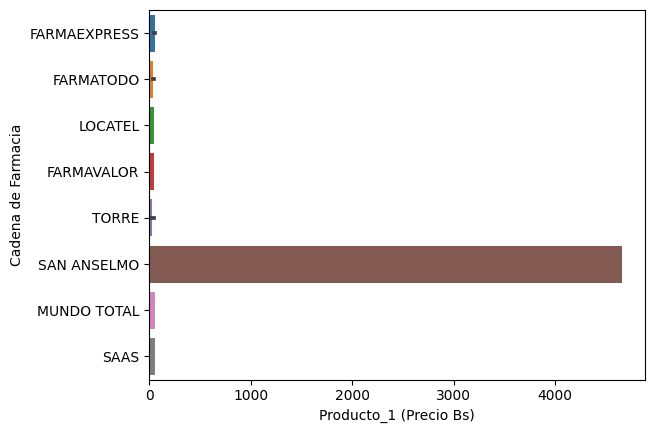

In [20]:
ax = sns.barplot(data=btl_new, x='Producto_1 (Precio Bs)', y='Cadena de Farmacia')

Observamos que existe un valor en los precios del producto uno que esta alterado y hace que el grafico se vea muy disperso, buscaremos que valor es y lo remplazaremos

In [21]:
btl_new['Producto_1 (Precio Bs)'].max() #El Precio del producto_1 es de 4653 es un Outlier y sera modificado a 46.53

4653.0

In [22]:
btl_new['Producto_1 (Precio Bs)'] = btl_new['Producto_1 (Precio Bs)'].apply(lambda x: 46.53 if x == 4653.0 else x)

In [23]:
btl_new = btl_new.fillna(0)

In [24]:
btl_new['Producto_1 (Precio Bs)'].max()

78.96

## Producto 1

In [25]:
disponibles = btl_new[btl_new['Producto_1 Disponible. si/no'] == 'Sí']

In [26]:
no_disponibles = btl_new[btl_new['Producto_1 Disponible. si/no'] == 'No']

[Text(0.5, 1.0, 'Variación del Precio del producto con respecto a la cadena Farmaceutica')]

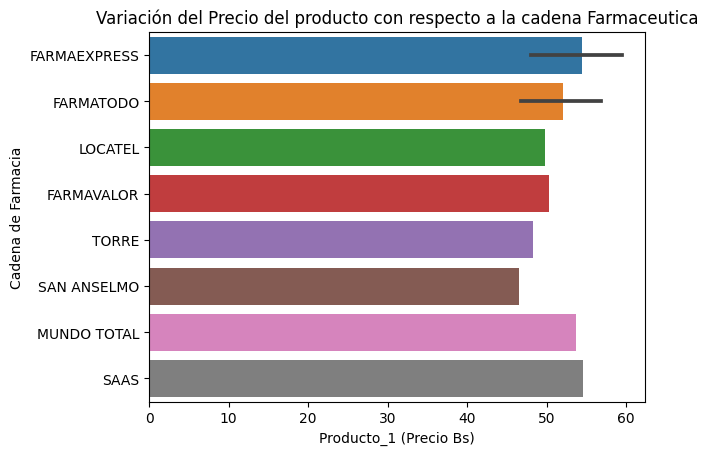

In [27]:
ax = sns.barplot(data=disponibles, x='Producto_1 (Precio Bs)', y = 'Cadena de Farmacia')
ax.set(title='Variación del Precio del producto con respecto a la cadena Farmaceutica')

Podemos apreciar de que los precios del producto 1 son más accesibles a los consumidores finales en las cadenas de Farmacia como: San Anselmo, Torre y Locatel

[Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Frecuencia acumulada del Producto 1, si esta disponible o no')]

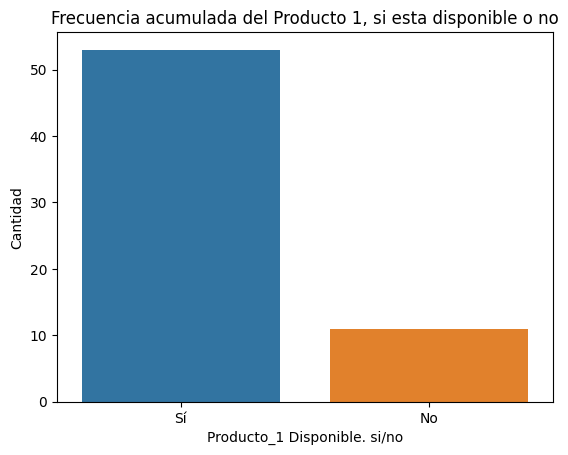

In [28]:
ax = sns.countplot(data=btl_new, x='Producto_1 Disponible. si/no')
ax.set(ylabel='Cantidad', title='Frecuencia acumulada del Producto 1, si esta disponible o no')

En que tiendas no esta disponible el producto 1?

Generaremos una nube de palabras para ver las tiendas exactas en las que no estan disponibles el producto 1

In [29]:
from wordcloud import WordCloud  #importamos la libreria que necesitamos para generar la nube de palabras

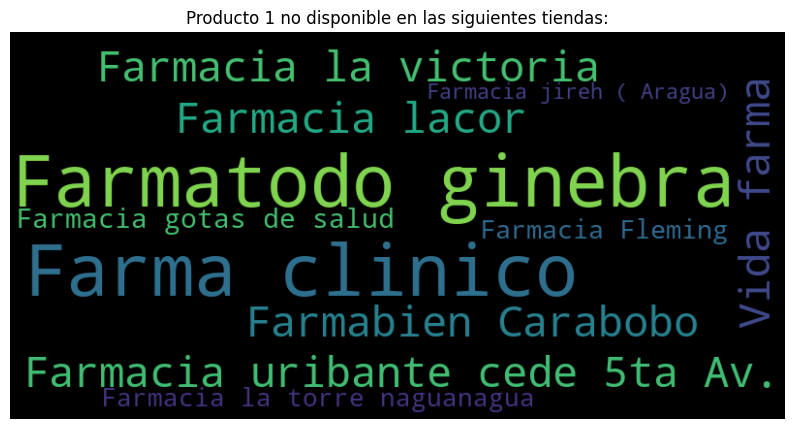

In [30]:
text = ' '.join(no_disponibles['Nombre del PDV'])
word_freq = no_disponibles['Nombre del PDV'].value_counts().to_dict()
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(sorted_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Producto 1 no disponible en las siguientes tiendas:')
plt.show()


Podemos apreciar rapidamente que el producto 1 no esta disponible en las tiendas que aparecen en el grafico anterior

In [31]:
grupo = (disponibles
         .groupby('Cadena de Farmacia')['Producto_1 (UND en Anaquel)']
         .mean()
         .reset_index()
         .sort_values(by='Producto_1 (UND en Anaquel)', ascending=False))

<AxesSubplot: title={'center': 'Grupo de Farmacias con más unidades del producto 1 en Anaquel'}>

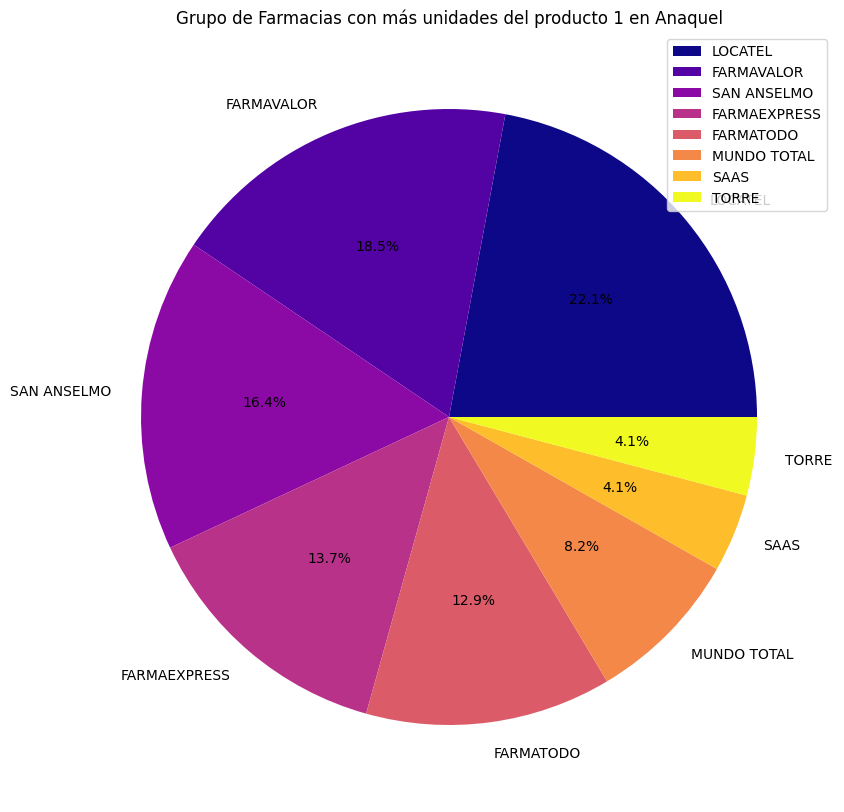

In [32]:
grupo.set_index('Cadena de Farmacia').plot.pie(y='Producto_1 (UND en Anaquel)', figsize=(10,10),
                colormap='plasma', title= 'Grupo de Farmacias con más unidades del producto 1 en Anaquel', ylabel='', autopct='%1.1f%%')

Podriamos decir que en un top 3 las cadenas de farmacias con mas unidades en anaquel son Locatel, FarmaValor y San Anselmo.

Esto generá cierta incertidumbre ya que la cadena de farmacia más grande de Venezuela es Farmatodo, pero quizas la data ofrecida no este tan completa o también podria ser de que al ser Farmatodo la cadena de Farmacias más grande del pais puede que salga de los productos más rapido con respecto a otras farmacias.

<AxesSubplot: xlabel='Producto_1 Inventario en deposito', ylabel='Cadena de Farmacia'>

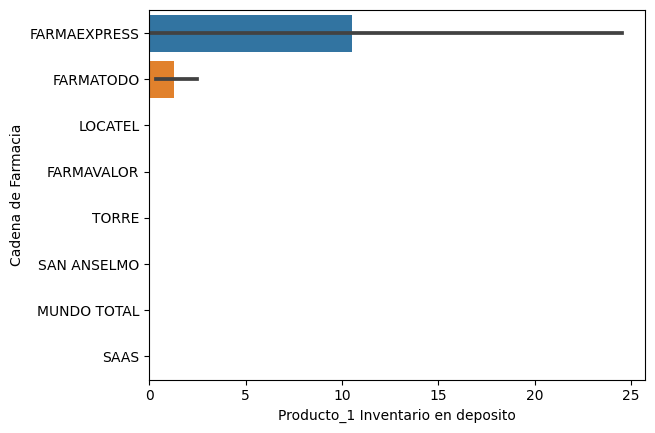

In [33]:
sns.barplot(data=disponibles, x='Producto_1 Inventario en deposito', y = 'Cadena de Farmacia')

Podemos apreciar de que existen una cantidad mas grande del producto 1 en inventario en deposito para las cadenas de Farmacia como farmatodo y Farmaexpress. Si bien no las otras cadenas de farmacia no marcan nada es porque no tiene el producto en deposito o porque no se dejo entrar al deposito a nuestro empleado y asumiremos que la cantidad en deposito del producto 1 es cero

[Text(0.5, 1.0, 'Producto 2 Caras Antes')]

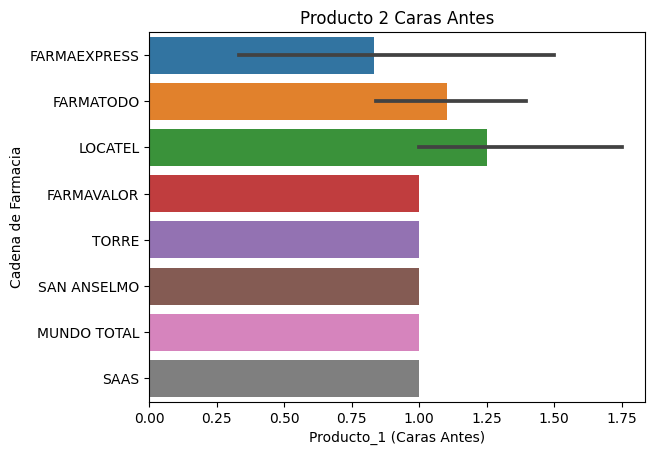

In [62]:
ax = sns.barplot(data=disponibles, x='Producto_1 (Caras Antes)', y='Cadena de Farmacia')
ax.set(title='Producto 2 Caras Antes')

[Text(0.5, 1.0, 'Producto 1 Caras Despues')]

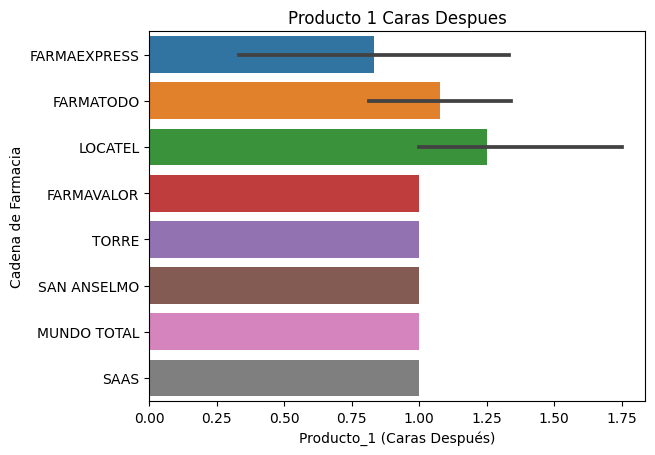

In [61]:
ax = sns.barplot(data=disponibles, x='Producto_1 (Caras Después)', y= 'Cadena de Farmacia')
ax.set(title='Producto 1 Caras Despues')

## Producto 2

[Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Frecuencia acumulada del Producto 2, si esta disponible o no')]

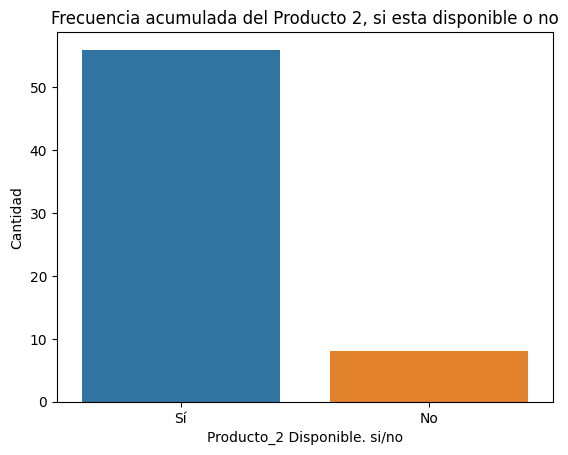

In [35]:
ax = sns.countplot(data=btl_new, x='Producto_2 Disponible. si/no')
ax.set(ylabel='Cantidad', title='Frecuencia acumulada del Producto 2, si esta disponible o no')

Separaremos la información para ver donde tenemos el producto 2 disponible y en que tiendas no lo esta

In [44]:
disponible_producto2 = btl_new[btl_new['Producto_2 Disponible. si/no'] == 'Sí']
no_disponible_producto2 = btl_new[btl_new['Producto_2 Disponible. si/no'] == 'No']

In [50]:
grupo2 = (disponible_producto2
          .groupby('Cadena de Farmacia')['Producto_2 (UND en Anaquel)']
          .mean()
          .reset_index()
          .sort_values(by='Producto_2 (UND en Anaquel)', ascending=False))

<AxesSubplot: title={'center': 'Grupo de Farmacias con más unidades del producto 2 en Anaquel'}>

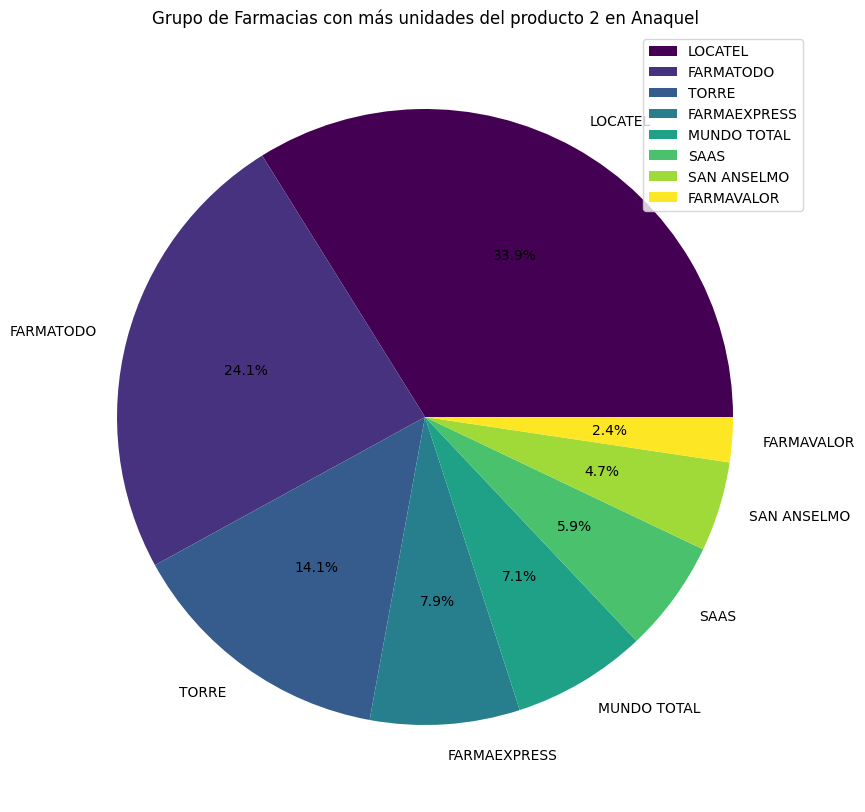

In [51]:
grupo2.set_index('Cadena de Farmacia').plot.pie(y='Producto_2 (UND en Anaquel)', figsize=(10,10),
                colormap='viridis', title= 'Grupo de Farmacias con más unidades del producto 2 en Anaquel', ylabel='', autopct='%1.1f%%')

Gracias al grafico de pie podemos vizualizar rapidamente que en un top 3 de cadenas de farmacias con más unidades en anaquel son Locatel con un 33.9%, Farmatodo con un 24.1% y Torre con un 14.1%

[Text(0.5, 1.0, 'Producto 2 Caras en anaquel (antes)')]

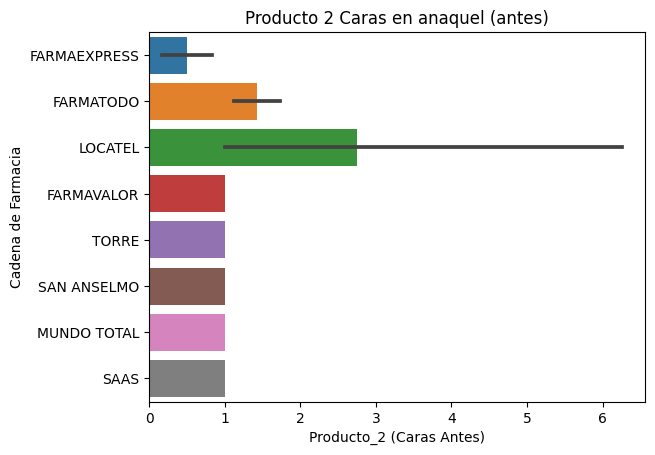

In [59]:
ax = sns.barplot(data=disponible_producto2, x='Producto_2 (Caras Antes)', y='Cadena de Farmacia')
ax.set(title='Producto 2 Caras en anaquel (antes)')

[Text(0.5, 1.0, 'Producto 2 Caras en anaquel (después)')]

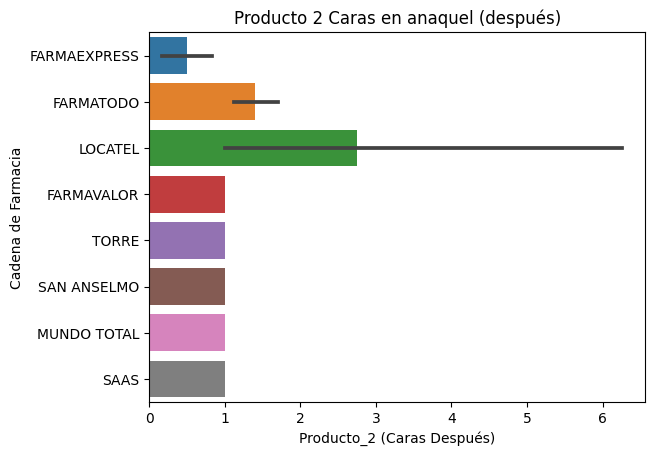

In [60]:
ax = sns.barplot(data=disponible_producto2, x='Producto_2 (Caras Después)', y='Cadena de Farmacia')
ax.set(title='Producto 2 Caras en anaquel (después)')

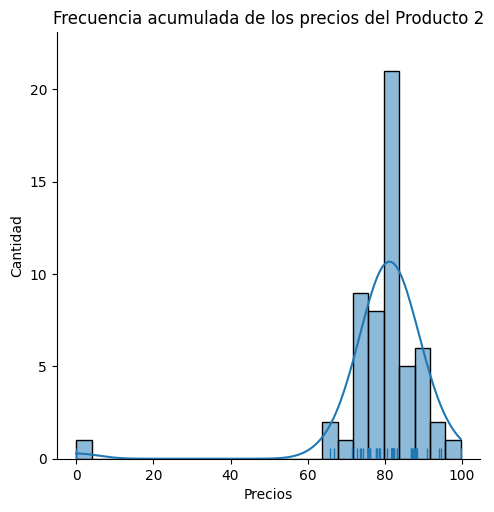

In [49]:
ax = sns.displot(data=disponible_producto2['Producto_2 (Precio Bs)'], bins=25, kde=True, rug=True)
ax.set(xlabel='Precios', title ='Frecuencia acumulada de los precios del Producto 2', ylabel='Cantidad')

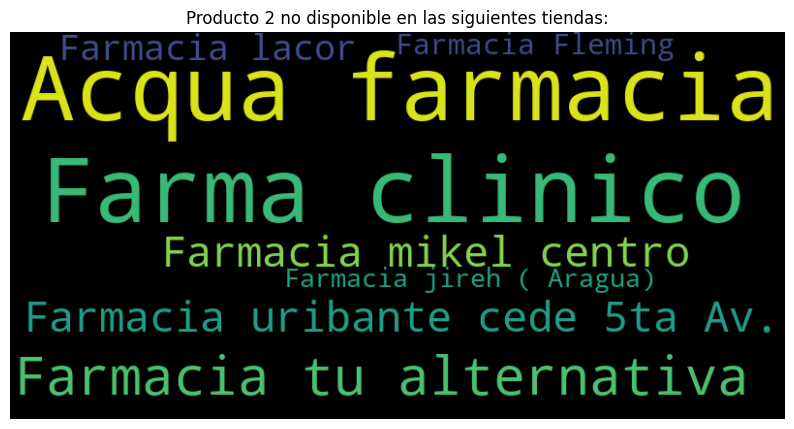

In [58]:
text = ' '.join(no_disponible_producto2['Nombre del PDV'])
word_freq = no_disponible_producto2['Nombre del PDV'].value_counts().to_dict()
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(sorted_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Producto 2 no disponible en las siguientes tiendas:')
plt.show()

En el Grafico anterior se puede apreciar los nombre de los establecimientos de nuestros clientes que no cuentan con disponibilidad del producto 2

## Producto 3

[Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Frecuencia acumulada del Producto 3, si esta disponible o no')]

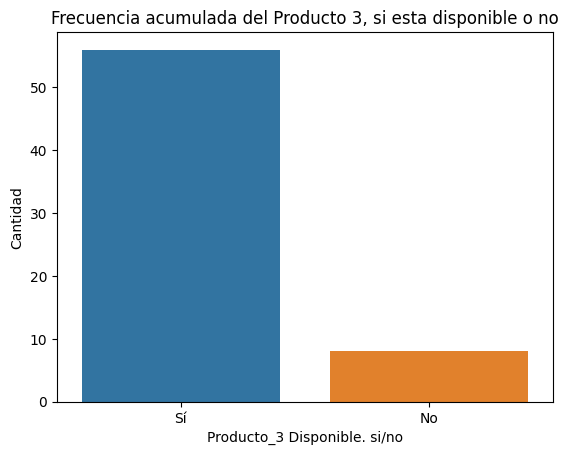

In [63]:
ax = sns.countplot(data=btl_new, x='Producto_3 Disponible. si/no')
ax.set(ylabel='Cantidad', title='Frecuencia acumulada del Producto 3, si esta disponible o no')

Veamos primero cuales son las tiendas que no cuentan con el producto 3

In [66]:
disponibles_producto3 = btl_new[btl_new['Producto_3 Disponible. si/no'] == 'Sí']
no_disponible_producto3 = btl_new[btl_new['Producto_3 Disponible. si/no'] == 'No']

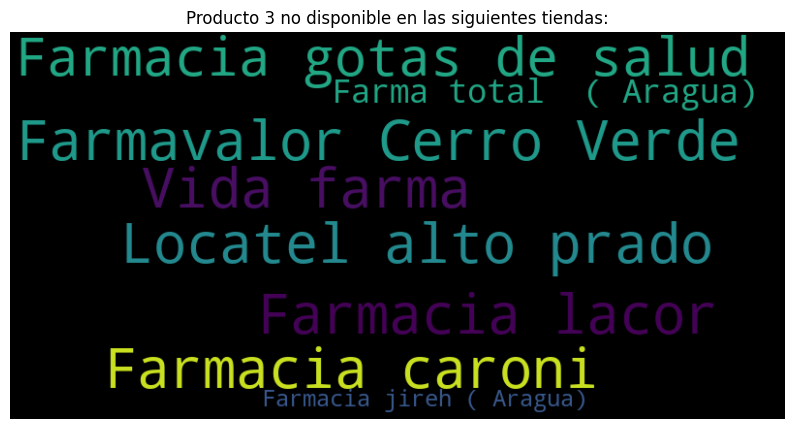

In [67]:
text = ' '.join(no_disponible_producto3['Nombre del PDV'])
word_freq = no_disponible_producto3['Nombre del PDV'].value_counts().to_dict()
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(sorted_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Producto 3 no disponible en las siguientes tiendas:')
plt.show()

Estas son las farmacias que no cuentan con disponiblidad del producto 3

In [68]:
#Veamos que Farmacias cuentan con mas disponibilidad en anaqueles del producto 3
grupo3 = (disponibles_producto3
          .groupby('Cadena de Farmacia')['Producto_3 (UND en Anaquel)']
          .mean()
          .reset_index()
          .sort_values(by='Producto_3 (UND en Anaquel)', ascending=False))

<AxesSubplot: title={'center': 'Grupo de Farmacias con más unidades del producto 3 en Anaquel'}>

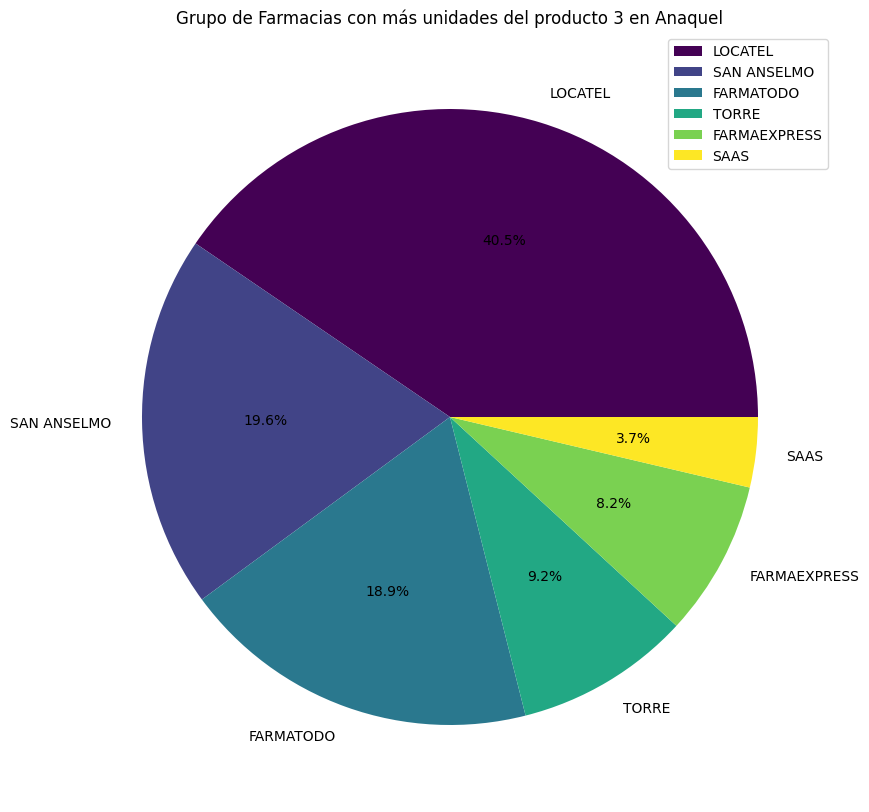

In [69]:
grupo3.set_index('Cadena de Farmacia').plot.pie(y='Producto_3 (UND en Anaquel)', figsize=(10,10),
            colormap='viridis', title= 'Grupo de Farmacias con más unidades del producto 3 en Anaquel', ylabel='', autopct='%1.1f%%')

En un top3 las farmacias con mas unidades del producto 3 son: Locatel con un 40.5%, San Anselmo con un 19.6%, Farmatodo con un 18.9%. 

Más alla de estos e puede apreciar que las cadenas de Farmacias que carecen del producto numero 3 son MundoTotal y FarmaValor. Se podria sugerir a estos 2 clientes que consideren ofrecer el producto 3 a los consumidores finales.

[Text(0.5, 1.0, 'Producto_3 (Caras Antes)')]

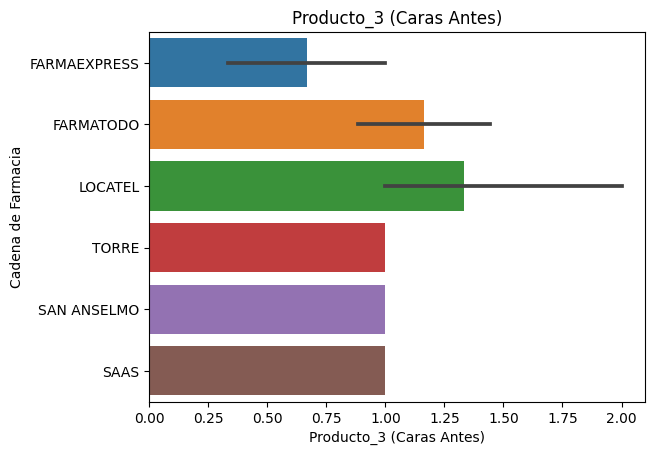

In [71]:
ax = sns.barplot(data=disponibles_producto3, x='Producto_3 (Caras Antes)', y='Cadena de Farmacia')
ax.set(title='Producto_3 (Caras Antes)')

[Text(0.5, 1.0, 'Producto_3 (Caras Después)')]

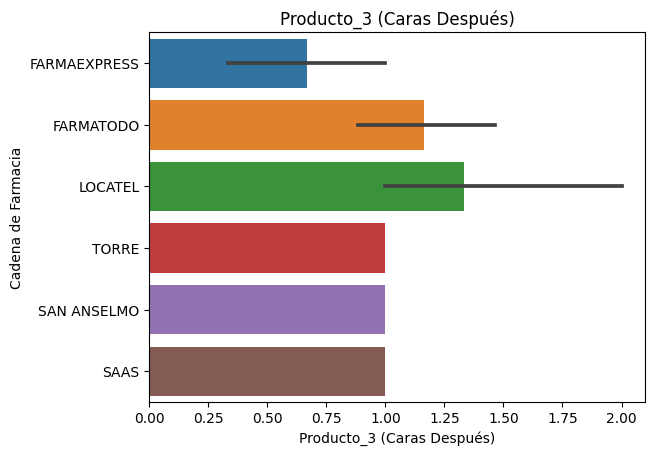

In [72]:
ax = sns.barplot(data=disponibles_producto3, x='Producto_3 (Caras Después)', y='Cadena de Farmacia')
ax.set(title='Producto_3 (Caras Después)')

[Text(0.5, 1.0, 'Producto_3 (Caras Competidor)')]

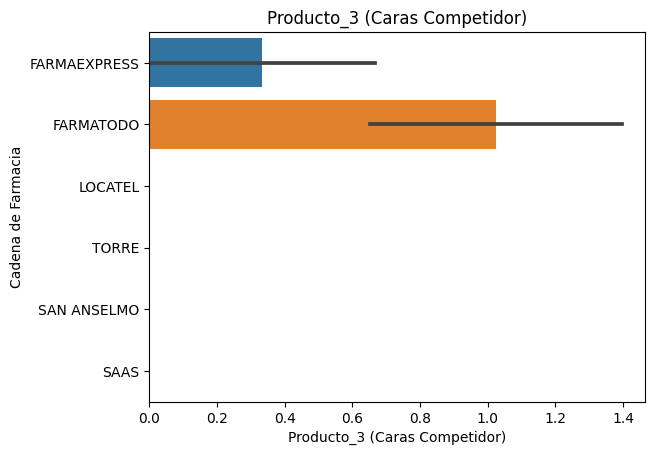

In [73]:
ax = sns.barplot(data=disponibles_producto3, x='Producto_3 (Caras Competidor)', y='Cadena de Farmacia')
ax.set(title='Producto_3 (Caras Competidor)')

Viendo los graficos anteriores podemos apreciar que en cantidad de caras de el producto 3 con respecto a nuestro competidor directo estamos mejor posicionados, esto no quiere decir que se deberia descuidar al contrario, debemos generar campañas de marketing más masivas que nos sigan manteniendo por encima de nuestra competencia.

            Evaluación del la frecuencia acumulada del precio del producto3 con respecto a nuestro competidor directo

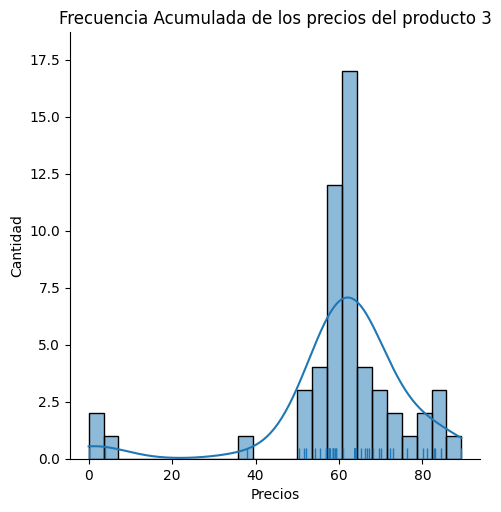

In [74]:
ax = sns.displot(data=disponibles_producto3['Producto_3 (Precio Bs)'], bins=25, kde=True, rug=True)
ax.set(xlabel='Precios', title ='Frecuencia Acumulada de los precios del producto 3', ylabel='Cantidad')

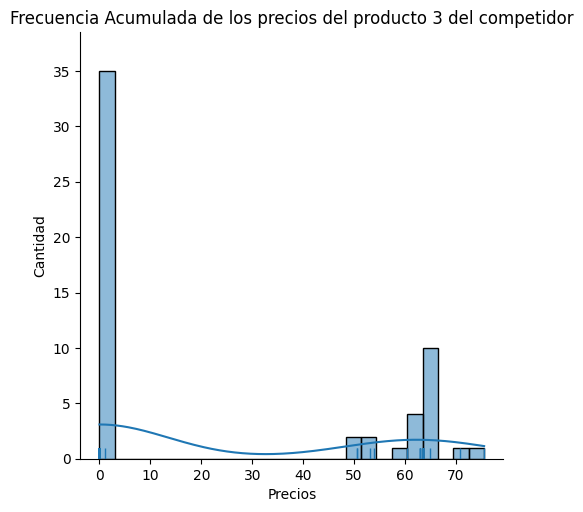

In [75]:
ax = sns.displot(data=disponibles_producto3['Producto_3 (Precio Bs Competidor)'], bins=25, kde=True, rug=True)
ax.set(xlabel='Precios', title ='Frecuencia Acumulada de los precios del producto 3 del competidor', ylabel='Cantidad')

Podemos apreciar que la frecuencia acumulada en los precios de nuestro competidor se acumulan en 0 porque muy pocas de las cadenas de farmacias tienen el producto 3

## Producto 4

[Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Frecuencia acumulada del Producto 4, si esta disponible o no')]

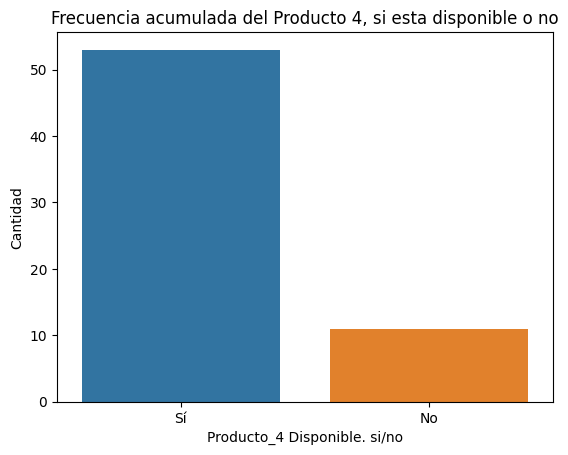

In [77]:
ax = sns.countplot(data=btl_new, x='Producto_4 Disponible. si/no')
ax.set(ylabel='Cantidad', title='Frecuencia acumulada del Producto 4, si esta disponible o no')

Veremos inmediatamente cuáles son las tiendas que no cuentan con el producto 4 y las que tambien cuentan

In [78]:
disponible_producto4 = btl_new[btl_new['Producto_4 Disponible. si/no'] == 'Sí']
no_disponible_producto4 = btl_new[btl_new['Producto_4 Disponible. si/no'] == 'No']

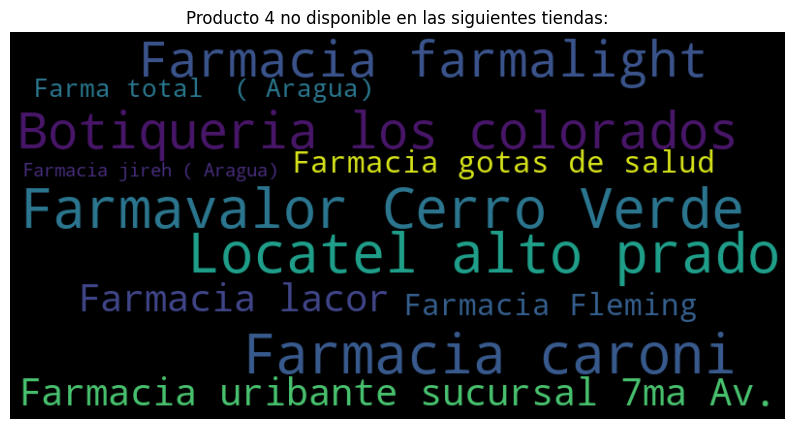

In [81]:
text = ' '.join(no_disponible_producto4['Nombre del PDV'])
word_freq = no_disponible_producto4['Nombre del PDV'].value_counts().to_dict()
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(sorted_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Producto 4 no disponible en las siguientes tiendas:')
plt.show()

In [85]:
#Veamos que Farmacias cuentan con mas disponibilidad en anaqueles del producto 4
grupo4 = (disponible_producto4
          .groupby('Cadena de Farmacia')['Producto_4 (UND en Anaquel)']
          .mean()
          .reset_index()
          .sort_values(by='Producto_4 (UND en Anaquel)', ascending=False))

<AxesSubplot: title={'center': 'Grupo de Farmacias con más unidades del producto 4 en Anaquel'}>

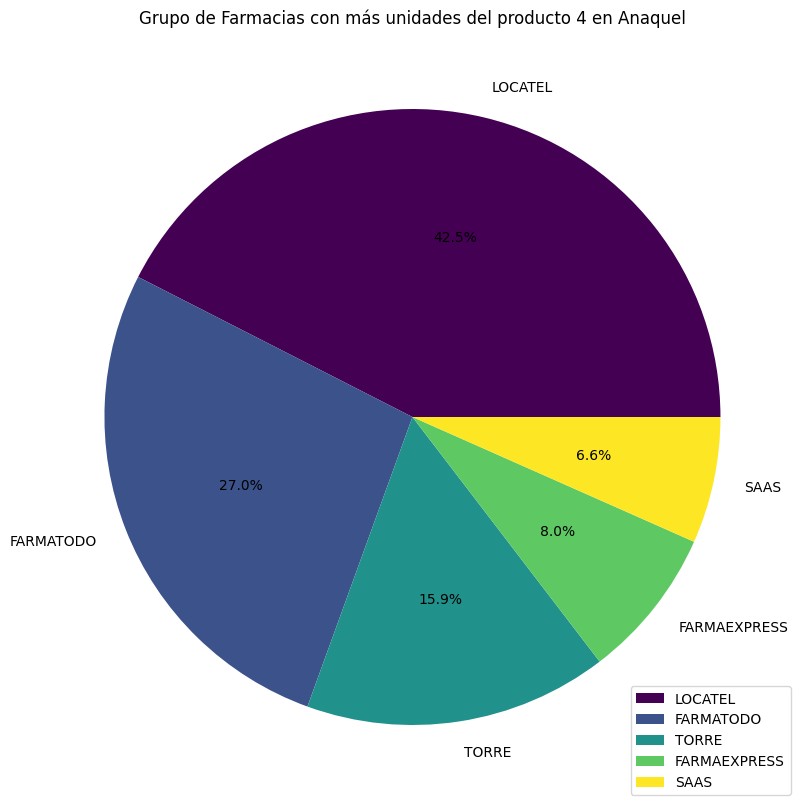

In [86]:
grupo4.set_index('Cadena de Farmacia').plot.pie(y='Producto_4 (UND en Anaquel)', figsize=(10,10),
            colormap='viridis', title= 'Grupo de Farmacias con más unidades del producto 4 en Anaquel', ylabel='', autopct='%1.1f%%')

Más alla de que podemos apreciar que las cadenas de farmacia como Locatel y Farmatodo cuentan con mas cantidad en anaqueles de el producto 4, sin embargo cabe destacar que no se aprecian en el grafico las cadenas de farmacia como: San Anselmo, Mundo Total y FarmaValor se recomienda en sugerir este producto a estas cadenas de farmacia antes que lo haga la competencia.

[Text(0.5, 1.0, 'Producto_4 (Caras Antes)')]

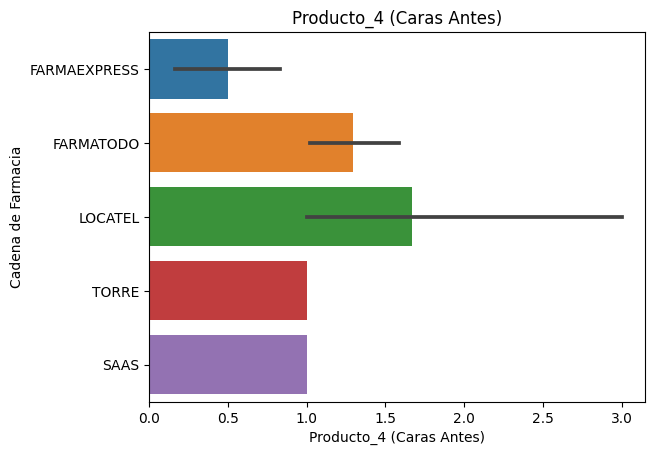

In [88]:
ax = sns.barplot(data=disponible_producto4, x='Producto_4 (Caras Antes)', y='Cadena de Farmacia')
ax.set(title='Producto_4 (Caras Antes)')

[Text(0.5, 1.0, 'Producto_4 (Caras Antes)')]

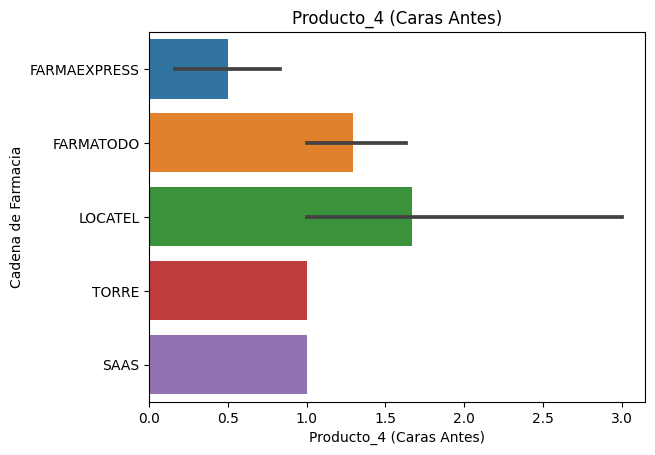

In [89]:
ax = sns.barplot(data=disponible_producto4, x='Producto_4 (Caras Antes)', y='Cadena de Farmacia')
ax.set(title='Producto_4 (Caras Antes)')

[Text(0.5, 1.0, 'Producto_4 (Caras Competidor)')]

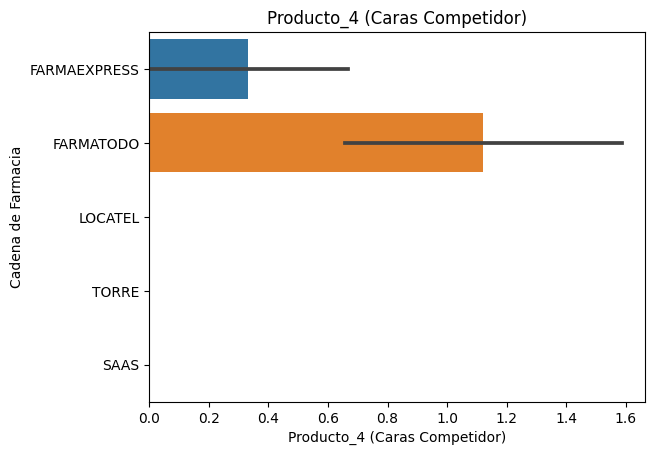

In [90]:
ax = sns.barplot(data=disponible_producto4, x='Producto_4 (Caras Competidor)', y='Cadena de Farmacia')
ax.set(title='Producto_4 (Caras Competidor)')

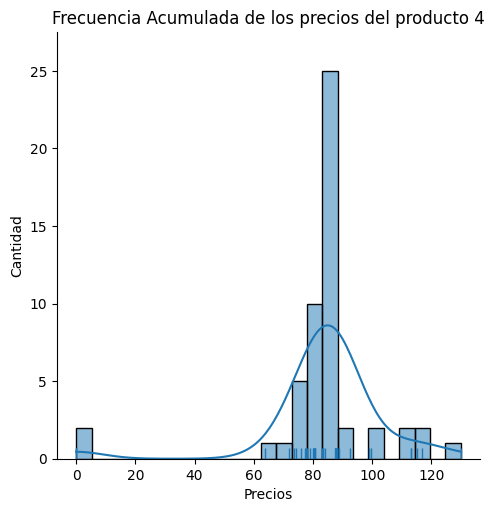

In [95]:
ax = sns.displot(data=disponible_producto4['Producto_4 (Precio Bs)'], bins=25, kde=True, rug=True)
ax.set(xlabel='Precios', title ='Frecuencia Acumulada de los precios del producto 4', ylabel='Cantidad')

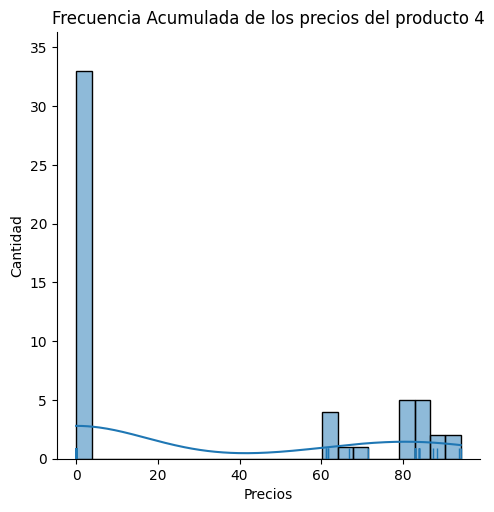

In [96]:
ax = sns.displot(data=disponible_producto4['Producto_4 (Precio Bs Competidor)'], bins=25, kde=True, rug=True)
ax.set(xlabel='Precios', title ='Frecuencia Acumulada de los precios del producto 4', ylabel='Cantidad')

Como era de esperarse los precios de nuestro competidor directo se acumulan en 0 ya que no disponen de el producto 4 en todas las cadenas de farmacias

## Producto 5

[Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Frecuencia acumulada del Producto 5, si esta disponible o no')]

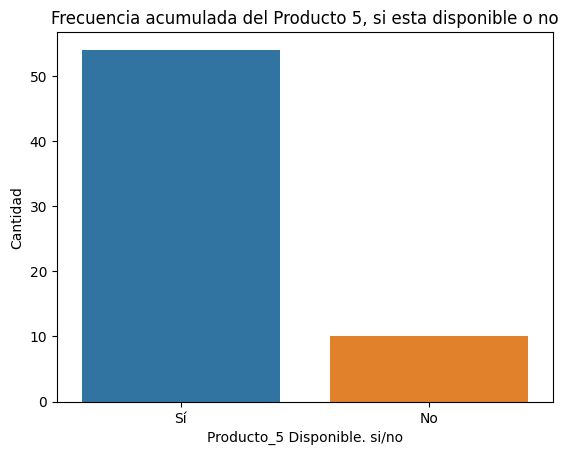

In [97]:
ax = sns.countplot(data=btl_new, x='Producto_5 Disponible. si/no')
ax.set(ylabel='Cantidad', title='Frecuencia acumulada del Producto 5, si esta disponible o no')

In [100]:
disponible_producto5 = btl_new[btl_new['Producto_5 Disponible. si/no'] =='Sí']
no_disponible_producto5 = btl_new[btl_new['Producto_5 Disponible. si/no'] =='No']

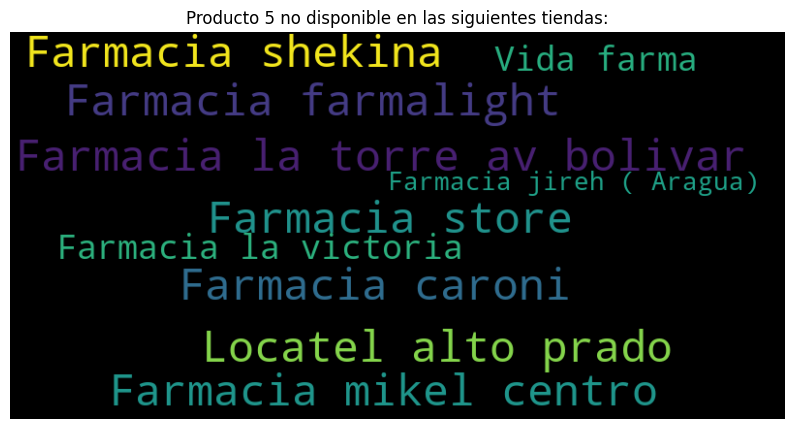

In [102]:
text = ' '.join(no_disponible_producto5['Nombre del PDV'])
word_freq = no_disponible_producto5['Nombre del PDV'].value_counts().to_dict()
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(sorted_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Producto 5 no disponible en las siguientes tiendas:')
plt.show()

En el grafico anterior se pueden vizualizar las tiendas que carecen del producto 5

In [103]:
#Veamos que Farmacias cuentan con mas disponibilidad en anaqueles del producto 5
grupo5 = (disponible_producto5
          .groupby('Cadena de Farmacia')['Producto_5 (UND en Anaquel)']
          .mean()
          .reset_index()
          .sort_values(by='Producto_5 (UND en Anaquel)', ascending=False))

<AxesSubplot: title={'center': 'Grupo de Farmacias con más unidades del producto 5 en Anaquel'}>

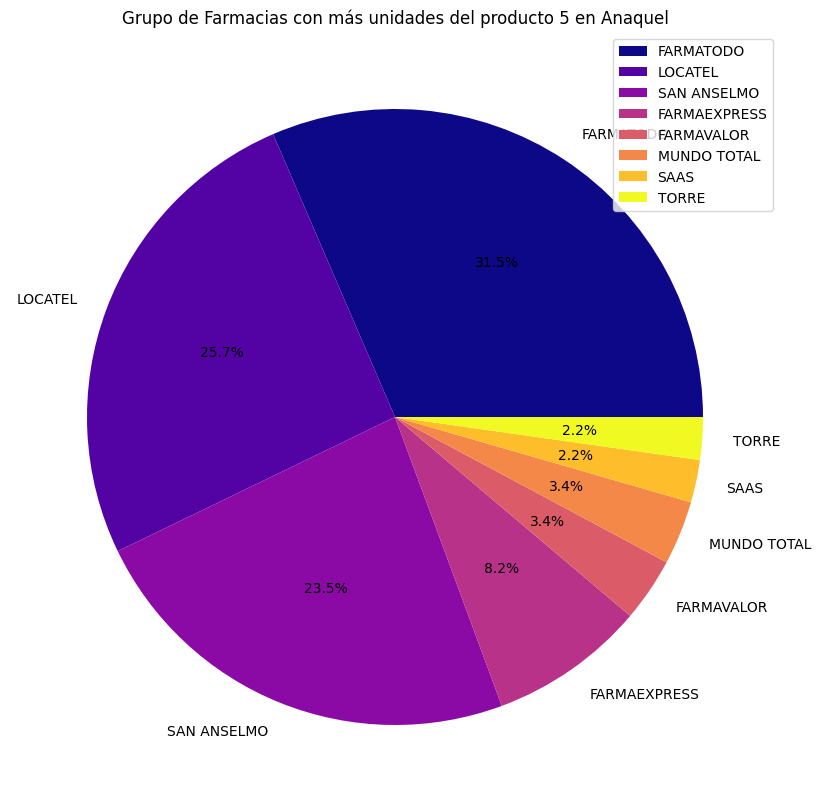

In [104]:
grupo5.set_index('Cadena de Farmacia').plot.pie(y='Producto_5 (UND en Anaquel)', figsize=(10,10),
            colormap='plasma', title='Grupo de Farmacias con más unidades del producto 5 en Anaquel', ylabel='', autopct='%1.1f%%')

Podemos observar de que todas las cadenas de farmacias cuentan con el producto 5 en anaqueles, y que en un top 3 las cadenas de farmacias con mas cantidad en anaqueles son: Farmatodo con un 31.5%, Locatel con un 25.7% y San Anselmo con un 23.5%.

[Text(0.5, 1.0, 'Producto_5 (Caras Antes)')]

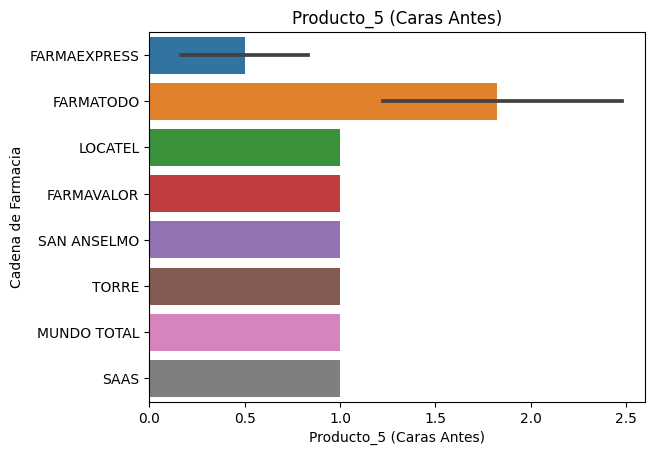

In [111]:
ax = sns.barplot(data=disponible_producto5, x='Producto_5 (Caras Antes)', y='Cadena de Farmacia')
ax.set(title='Producto_5 (Caras Antes)')

[Text(0.5, 1.0, 'Inventario del producto 5')]

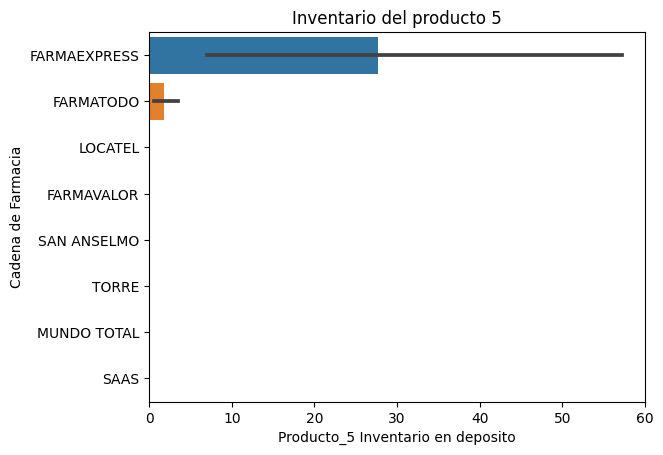

In [112]:
ax = sns.barplot(data=disponible_producto5, x='Producto_5 Inventario en deposito', y='Cadena de Farmacia')
ax.set(title='Inventario del producto 5')

[Text(0.5, 1.0, 'Producto_5 (Caras después)')]

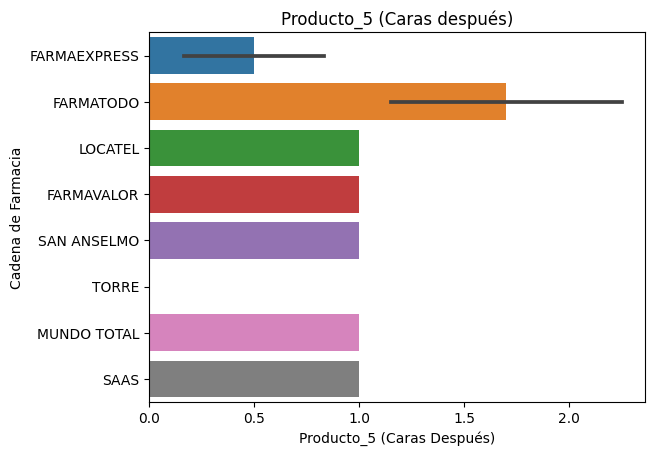

In [113]:
ax = sns.barplot(data=disponible_producto5, x='Producto_5 (Caras Después)', y='Cadena de Farmacia')
ax.set(title='Producto_5 (Caras después)')

Algo interesante seria aportar es que luego del inventario el producto 5 ya no esta en anaqueles, si bien antes tenia 2 caras en anaquel actualmente ya no las tiene, se desconoce la causa se supondra que los productos estan vencidos

## Producto 6

[Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Frecuencia acumulada del Producto 6, si esta disponible o no')]

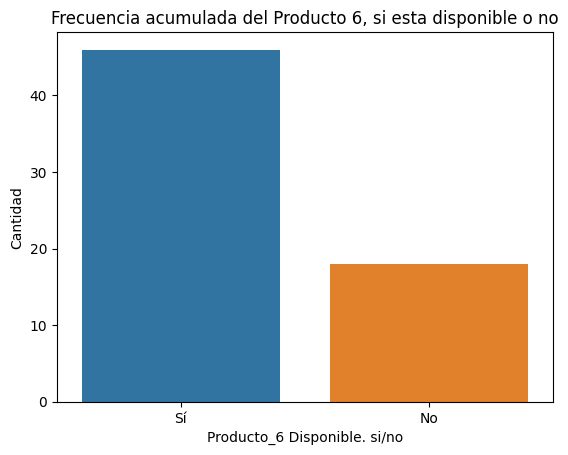

In [114]:
ax = sns.countplot(data=btl_new, x='Producto_6 Disponible. si/no')
ax.set(ylabel='Cantidad', title='Frecuencia acumulada del Producto 6, si esta disponible o no')

Evaluaremos la información del producto 6 en las cadenas de Farmacia donde esta disponible y donde no esta.

In [115]:
disponible_producto6 = btl_new[btl_new['Producto_6 Disponible. si/no'] == 'Sí']
no_disponible_producto6 = btl_new[btl_new['Producto_6 Disponible. si/no'] == 'No']

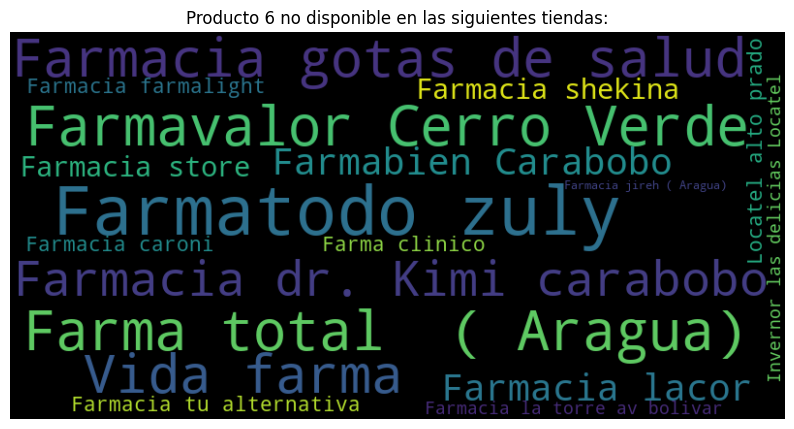

In [116]:
#Tiendas de FArmacias que no cuentan con el producto 6
text = ' '.join(no_disponible_producto6['Nombre del PDV'])
word_freq = no_disponible_producto6['Nombre del PDV'].value_counts().to_dict()
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(sorted_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Producto 6 no disponible en las siguientes tiendas:')
plt.show()

Con respecto a los productos anteriores el producto 6 esta más escaso en muchas mas tiendas 

In [117]:
#Chequeamos cuales son las cadenas de farmacia con mas unidades en anaqueles del producto6 
grupo6 = (disponible_producto6
          .groupby('Cadena de Farmacia')['Producto_6 (UND en Anaquel)']
          .mean()
          .reset_index()
          .sort_values(by='Producto_6 (UND en Anaquel)', ascending=False))

<AxesSubplot: title={'center': 'Cadena de farmacia con mas unidades del producto 6 en anaqueles'}>

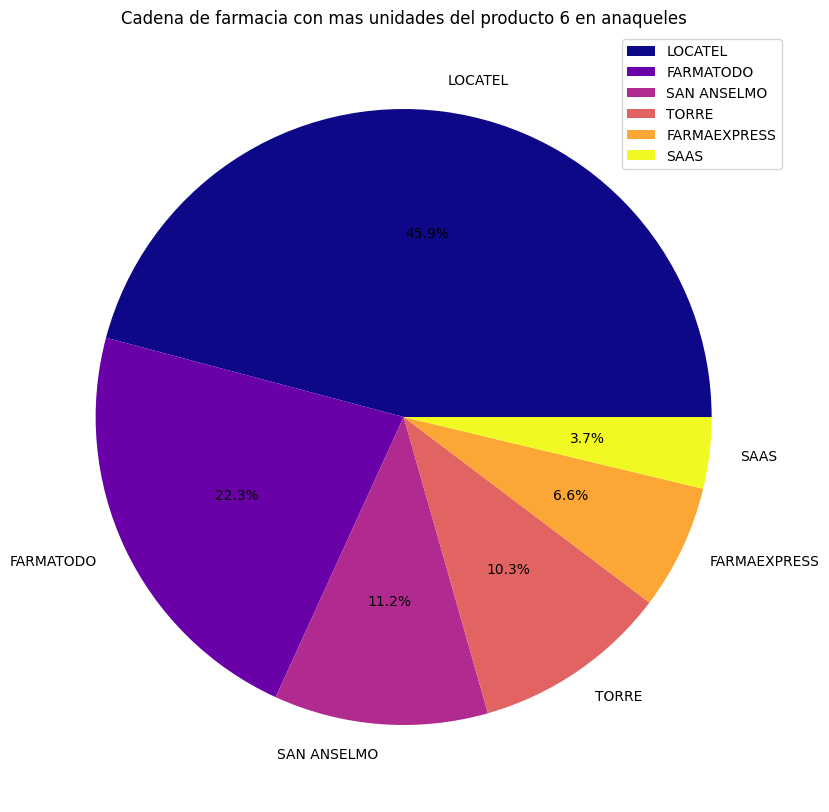

In [118]:
grupo6.set_index('Cadena de Farmacia').plot.pie(y='Producto_6 (UND en Anaquel)', figsize=(10,10),
                colormap='plasma', ylabel='', title='Cadena de farmacia con mas unidades del producto 6 en anaqueles', autopct='%1.1f%%' )

Podemos apreciar que las cadenas de farmacia como mundo total y FarmaValor carecen del producto 6 

[Text(0.5, 1.0, 'Producto 6 en anaqueles (Caras Antes)')]

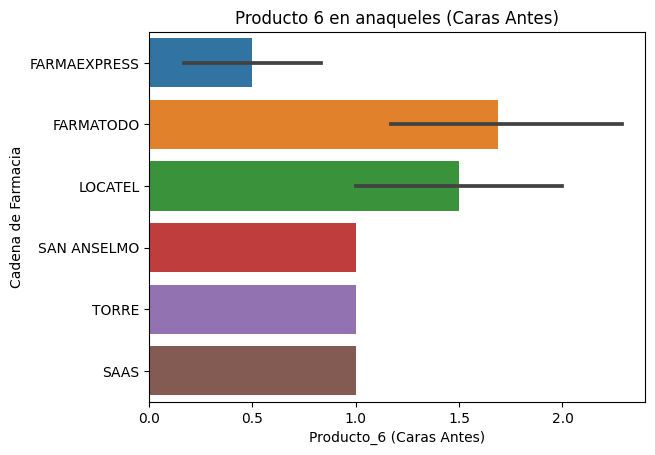

In [121]:
ax = sns.barplot(data=disponible_producto6, x='Producto_6 (Caras Antes)', y='Cadena de Farmacia')
ax.set(title='Producto 6 en anaqueles (Caras Antes)')

[Text(0.5, 1.0, 'Producto 6 en anaqueles (Caras Antes)')]

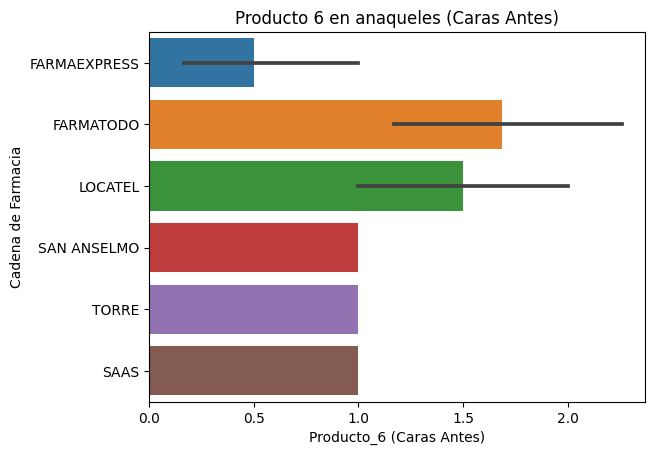

In [122]:
ax = sns.barplot(data=disponible_producto6, x='Producto_6 (Caras Antes)', y='Cadena de Farmacia')
ax.set(title='Producto 6 en anaqueles (Caras Antes)')

No hubo una variación tan significativa en los cambios de las caras en los anaqueles con respecto al producto 6

En el Producto 6 tenemos competencia evaluaremos sus metricas y compararemos con las nuestras

[Text(0.5, 1.0, 'Producto_6 (Caras Competidor)')]

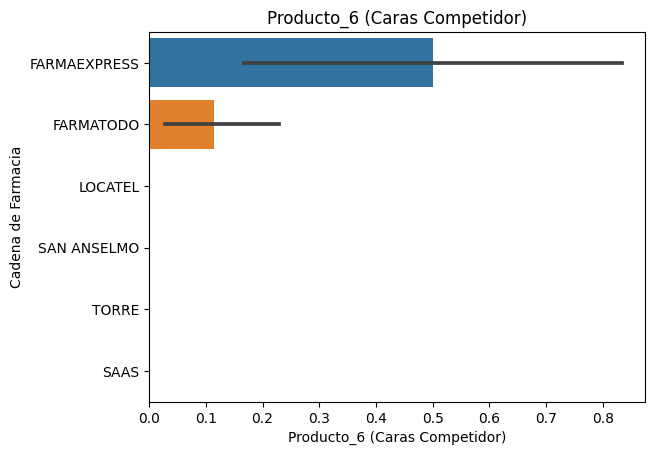

In [123]:
ax = sns.barplot(data=disponible_producto6, x='Producto_6 (Caras Competidor)', y='Cadena de Farmacia')
ax.set(title='Producto_6 (Caras Competidor)')

comparación en los precios

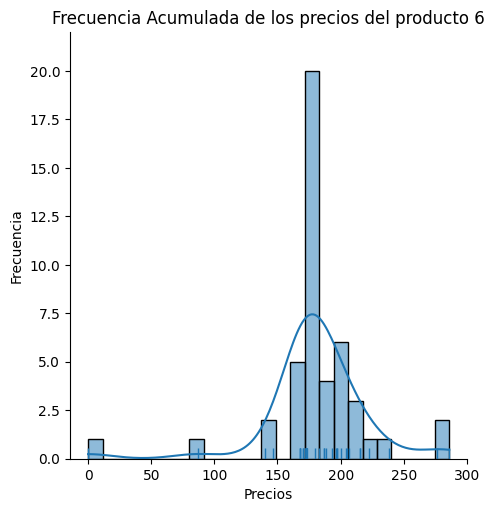

In [125]:
ax = sns.displot(data=disponible_producto6['Producto_6 (Precio Bs)'], bins=25, kde=True, rug=True)
ax.set(xlabel='Precios', title ='Frecuencia Acumulada de los precios del producto 6', ylabel='Frecuencia')

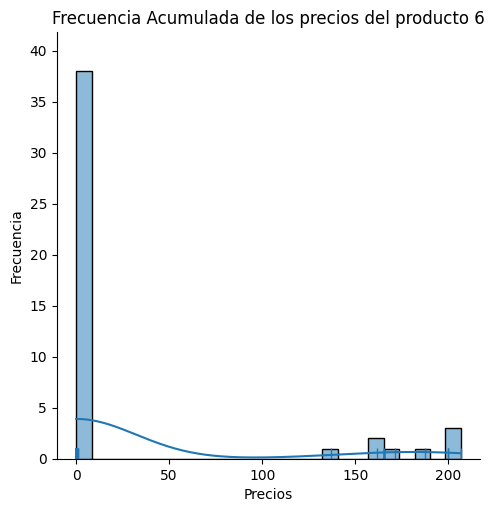

In [126]:
ax = sns.displot(data=disponible_producto6['Producto_6 (Precio Bs Competidor)'], bins=25, kde=True, rug=True)
ax.set(xlabel='Precios', title ='Frecuencia Acumulada de los precios del producto 6', ylabel='Frecuencia')

Podemos observar que de los pocos productos que tiene la competencia estan cerca de los precios de nuestros clientes y que estamos mejor posicionados de acuerdo a la cantidad de cadena de Farmacias que nos prefieren como sus mejores mercaderistas